<a href="https://colab.research.google.com/github/waveletdeboshir/speechaugs/blob/master/waveletdeboshir/speechaugs/examples/Augmentations_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install speechaugs > /dev/null

In [2]:
!git clone https://github.com/waveletdeboshir/speechaugs.git

Cloning into 'speechaugs'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 168 (delta 78), reused 133 (delta 51), pack-reused 0
Receiving objects: 100% (168/168), 1.42 MiB | 4.49 MiB/s, done.
Resolving deltas: 100% (78/78), done.


In [3]:
!pip install torchaudio > /dev/null

ERROR: torchvision 0.8.1+cu101 has requirement torch==1.7.0, but you'll have torch 1.7.1 which is incompatible.


In [4]:
import torch, torchaudio
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [5]:
torchaudio.set_audio_backend('sox_io')

## Initial audio & waveform

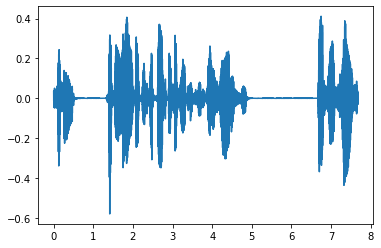

In [8]:
audiopath = '/content/speechaugs/examples/initial.wav'
ex_waveform, SR = torchaudio.load(audiopath)
plt.plot(np.arange(0,ex_waveform.shape[1])/SR, ex_waveform[0])
IPython.display.Audio(audiopath)

In [18]:
db_melspecs_comp = torch.nn.Sequential(torchaudio.transforms.MelSpectrogram(sample_rate=SR, n_fft = 2048, hop_length=512, n_mels = 128),
                                       torchaudio.transforms.AmplitudeToDB())

In [20]:
MS_initial = db_melspecs_comp(ex_waveform) #Melspectrogram for illustration of some methods

# Augmentations

In [9]:
import albumentations as A

In [10]:
from speechaugs import TimeStretchLibrosa, ForwardTimeShift, PitchShiftLibrosa, ColoredNoise, Inversion, ZeroSamples, ClippingSamples

In [13]:
MAX_DURATION = 10.

## TimeStretchLibrosa

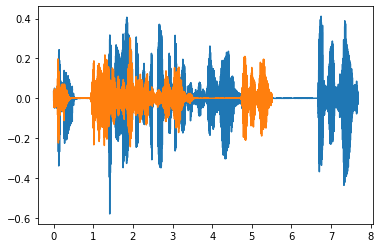

In [15]:
augmented1 = TimeStretchLibrosa(p=1., max_duration=MAX_DURATION, sr=SR)(waveform=ex_waveform)['waveform']
torchaudio.save('time_stretch.wav', augmented1, SR)
plt.plot(np.arange(0,ex_waveform.shape[1])/SR, ex_waveform[0])
plt.plot(np.arange(0,augmented1.shape[1])/SR, augmented1[0])
IPython.display.Audio('time_stretch.wav')

## ForwardTimeShift

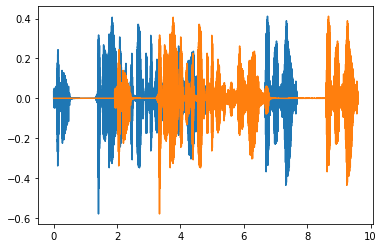

In [17]:
augmented2 = ForwardTimeShift(p=1., max_duration=MAX_DURATION, sr=SR)(waveform=ex_waveform)['waveform']
torchaudio.save('shift.wav', augmented2, SR)
plt.figure()
plt.plot(np.arange(0,ex_waveform.shape[1])/SR, ex_waveform[0])
plt.plot(np.arange(0,augmented2.shape[1])/SR, augmented2[0])
IPython.display.Audio('shift.wav')

## PitchShiftLibrosa

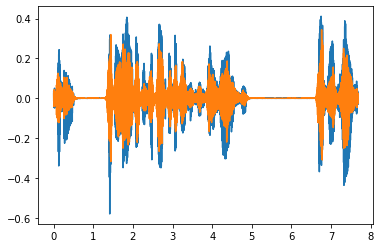

In [24]:
augmented3 = PitchShiftLibrosa(p=1., sr=SR)(waveform=ex_waveform)['waveform']
torchaudio.save('pitch_shift.wav', augmented3, SR)
plt.plot(np.arange(0,ex_waveform.shape[1])/SR, ex_waveform[0])
plt.plot(np.arange(0,augmented3.shape[1])/SR, augmented3[0])
IPython.display.Audio('pitch_shift.wav')

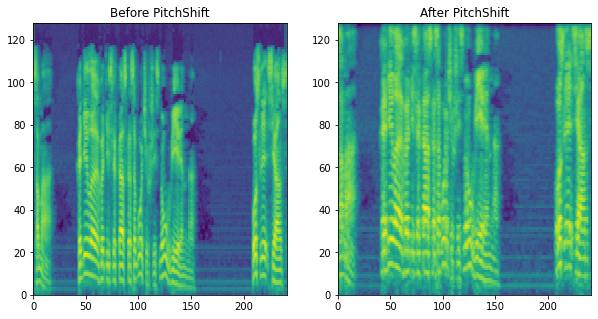

In [25]:
# Melspectrograms
MS_pitch = db_melspecs_comp(augmented3)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].pcolormesh(MS_initial[0])
ax[0].set(title='Before PitchShift')
ax[1].pcolormesh(MS_pitch[0])
ax[1].set(title='After PitchShift');

## ColoredNoise

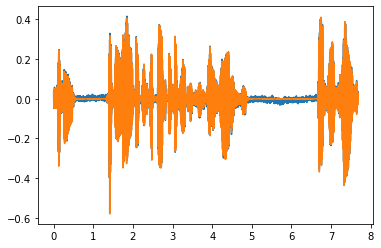

In [30]:
augmented4 = ColoredNoise(p=1.)(waveform=ex_waveform)['waveform']
torchaudio.save('colored_noise.wav', augmented4, SR)
plt.figure()
plt.plot(np.arange(0,augmented4.shape[1])/SR, augmented4[0])
plt.plot(np.arange(0,ex_waveform.shape[1])/SR, ex_waveform[0])

IPython.display.Audio('colored_noise.wav')

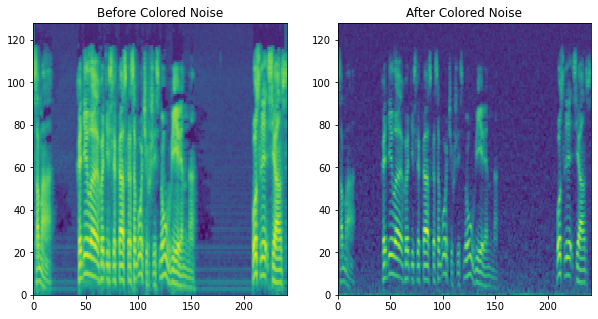

In [31]:
# Melspectrograms
MS_colored = db_melspecs_comp(augmented4)
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].pcolormesh(MS_initial[0])
ax[0].set(title='Before Colored Noise')
ax[1].pcolormesh(MS_colored[0])
ax[1].set(title='After Colored Noise');

## Inversion

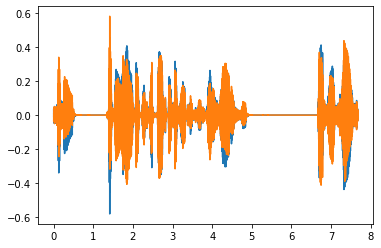

In [32]:
augmented5 = Inversion(p=1.)(waveform=ex_waveform)['waveform']
torchaudio.save('inversion.wav', augmented5, SR)
plt.figure()
plt.plot(np.arange(0,ex_waveform.shape[1])/SR, ex_waveform[0])
plt.plot(np.arange(0,augmented5.shape[1])/SR, augmented5[0])

IPython.display.Audio('inversion.wav')

## ZeroSamples

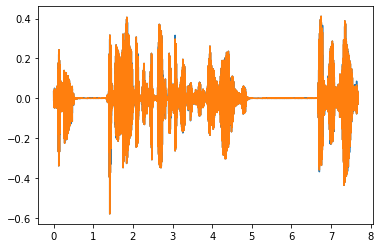

In [33]:
augmented6 = ZeroSamples(p=1.)(waveform=ex_waveform)['waveform']
torchaudio.save('zero.wav', augmented6, SR)
plt.figure()
plt.plot(np.arange(0,ex_waveform.shape[1])/SR, ex_waveform[0])
plt.plot(np.arange(0,augmented6.shape[1])/SR, augmented6[0]) # can't see any significant difference

IPython.display.Audio('zero.wav') # but if we listen we can hear crackle

## ClippingSamples

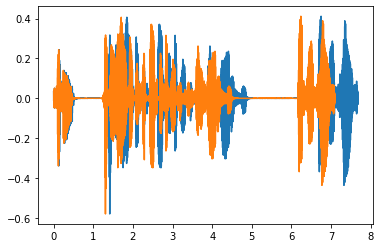

In [34]:
augmented7 = ClippingSamples(p=1.)(waveform=ex_waveform)['waveform']
torchaudio.save('clip.wav', augmented7, SR)
plt.figure()
plt.plot(np.arange(0,ex_waveform.shape[1])/SR, ex_waveform[0])
plt.plot(np.arange(0,augmented7.shape[1])/SR, augmented7[0])

IPython.display.Audio('clip.wav') # also can hear crackle

## Composition

In [43]:
transforms = A.Compose([
    ForwardTimeShift(p=0.5),
    Inversion(p=0.5),
    A.OneOf([ZeroSamples(p=0.5), ClippingSamples(p=0.5)], p=0.5),
    A.OneOf([TimeStretchLibrosa(p=0.5), PitchShiftLibrosa(p=0.5)], p = 0.5),
    ColoredNoise(p=0.5)
], p=1.0)

In [44]:
augmented = transforms(waveform=ex_waveform)['waveform']
torchaudio.save('aug.wav', augmented, SR)
IPython.display.Audio('aug.wav')